In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Import the JgKMeans class
from jg_ml_models import JgKMeans, JgPCA

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("../Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [5]:
# Initialize the JgKMeans class with the original market data
jg_kmeans = JgKMeans(market_data_df)

# Scale the numeric columns and put results into a new DataFrame
scaled_market_data_df = jg_kmeans.scale_numeric_columns(jg_kmeans.get_numeric_columns())

# Display sample data
scaled_market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Scaled DataFrame.

c:\Users\jim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

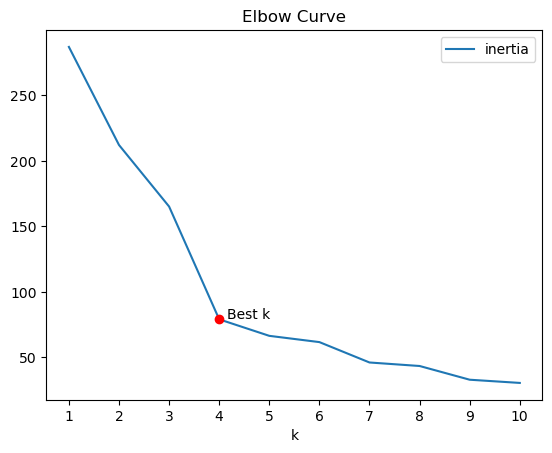

In [6]:
# Initialize the K-Means model with the scaled market data
jg_kmeans = JgKMeans(scaled_market_data_df)

# Plot the elbow curve
elbow_df = jg_kmeans.get_elbow_df(1, 11)
jg_kmeans.plot_elbow_curve(elbow_df)

In [7]:
# Print the best k details
jg_kmeans.print_best_k_details(elbow_df)

Pct decrease from k=1 to k=2:  29.19 %,                       Total decrease:  29.19 %
Pct decrease from k=2 to k=3:  18.32 %,                       Total decrease:  47.50 %
Pct decrease from k=3 to k=4:  33.57 %,                       Total decrease:  81.07 %
Pct decrease from k=4 to k=5:  4.92 %,                       Total decrease:  85.99 %
Pct decrease from k=5 to k=6:  1.86 %,                       Total decrease:  87.85 %
Pct decrease from k=6 to k=7:  6.07 %,                       Total decrease:  93.92 %
Pct decrease from k=7 to k=8:  1.05 %,                       Total decrease:  94.96 %
Pct decrease from k=8 to k=9:  4.09 %,                       Total decrease:  99.05 %
Pct decrease from k=9 to k=10:  0.95 %,                       Total decrease:  100.00 %
Best k: 4


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**  4

### Cluster Cryptocurrencies with K-means Using the Scaled Data.

In [8]:
# Fit and predict the scaled data using 4 clusters
cyrpto_predictions_df = jg_kmeans.fit_and_predict(k=4, predict_col_name="crypto_cluster")

# Display sample predicted data
cyrpto_predictions_df.head()

c:\Users\jim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

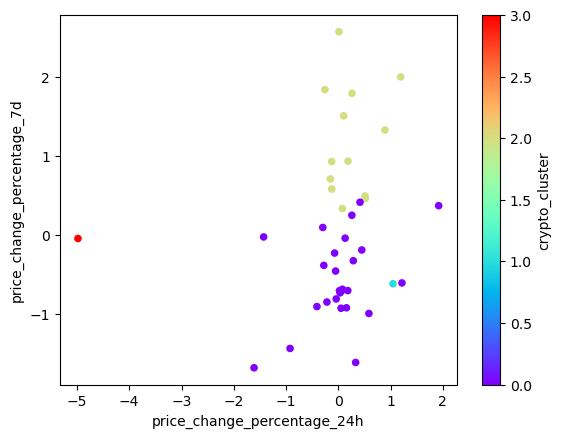

In [9]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
cyrpto_predictions_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_cluster",
    colormap="rainbow")

### Optimize Clusters with Principal Component Analysis.

In [10]:
# Create a PCA model instance and set `n_components=3`.
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
jg_pca = JgPCA(3, scaled_market_data_df)


In [11]:
# View the first five rows of the DataFrame. 
market_pca_df = jg_pca.get_df()

market_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [12]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
variance_ratio = jg_pca.get_pca().explained_variance_ratio_
print(variance_ratio)

total_variance = variance_ratio.sum()
print(total_variance)

[0.3719856  0.34700813 0.17603793]
0.895031657030984


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.895

In [13]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
market_pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [14]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11


# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = jg_pca.get_elbow_df(k_start=1, k_end=11)

# Display the DataFrame
pca_elbow_df

c:\Users\jim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


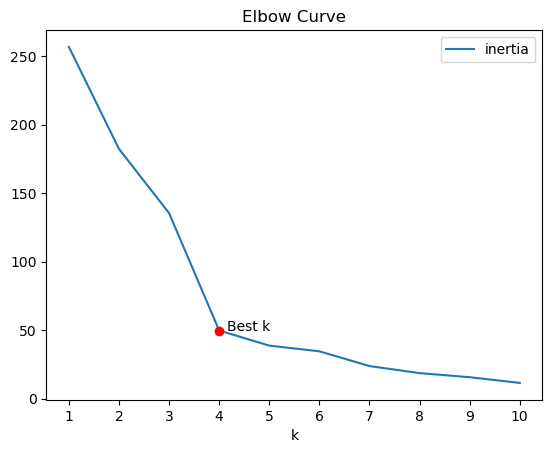

In [15]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
jg_pca.plot_elbow_curve(pca_elbow_df)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [16]:
# Initialize the K-Means model using the best value for k


In [17]:
# Fit the K-Means model using the PCA data


In [18]:
# Predict the clusters to group the cryptocurrencies using the PCA data


# Print the resulting array of cluster values.


In [19]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters
predicted_pca_df = jg_pca.fit_and_predict(k=4, predict_col_name='crypto_cluster')

# Display sample data
predicted_pca_df.head()

c:\Users\jim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

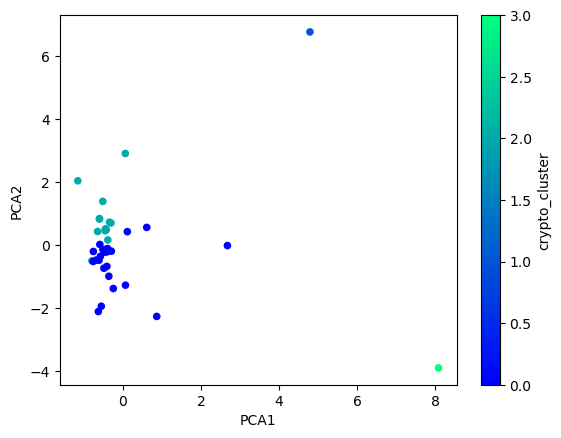

In [20]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
predicted_pca_df.plot.scatter(x='PCA1', y='PCA2', c='crypto_cluster', colormap='winter')

### Determine the Weights of Each Feature on each Principal Component

In [21]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights_df = jg_pca.get_pca_component_weights_df()
pca_component_weights_df

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

* PCA1: 
    * Strongest positive influence: **price_change_percentage_200d** =  0.594468
    * Strongest negative influence: **price_change_percentage_24h**	 = -0.416728

* PCA2:
    * Strongest positive influence: **price_change_percentage_30d** = 0.562182
    * Only negative influence: **price_change_percentage_1y** = -0.150789

* PCA3:
    * Strongest positive influence: **price_change_percentage_7d**  =  0.787670
    * Strongest negative influence: **price_change_percentage_60d** = -0.361377
